In [2]:
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate
plt.rcParams["font.family"] = "D2Coding"

# FitzHugh-Nagumo model(FHN)

$$\begin{align*}
& \frac{dV}{dt} = V - \frac{V^3}{3}-w+RI_{\text{ext}}\\
& \tau \frac{dI}{dt} = V + a - bI
\end{align*}$$

In [26]:
def fitzhugh_nagumo(x, t, a, b, tau, I):
    """Time derivative of the Fitzhugh-Nagumo neural model.
    Args:
       x (array size 2): [Membrane potential, Recovery variable]
       a, b (float): Parameters.
       tau (float): Time scale.
       t (float): Time (Not used: autonomous system)
       I (float): Constant stimulus current.
    Return: dx/dt (array size 2)
    """
    return np.array([x[0] - x[0]**3 - x[1] + I,
                     (x[0] - a - b * x[1])/tau])

In [27]:
def get_displacement(param, dmax=0.5,time_span=np.linspace(0,200, 1000), number=20):
    # We start from the resting point...
    ic = scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                y0=[0,0],
                                t= np.linspace(0,999, 1000))[-1]
    # and do some displacement of the potential.
    traj = []
    for displacement in np.linspace(0,dmax, number):
        traj.append(scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                           y0=ic+np.array([displacement,0]),
                                           t=time_span))
    return traj

In [85]:
t, dt = np.linspace(0, 500, 500000, retstep=True)

a = -0.3
b= 1.4
tau = 50
I = 0.23

traj = get_displacement({"a": a, "b": b, "tau": tau, "I": I}, time_span=t, number=2, dmax=0.5)

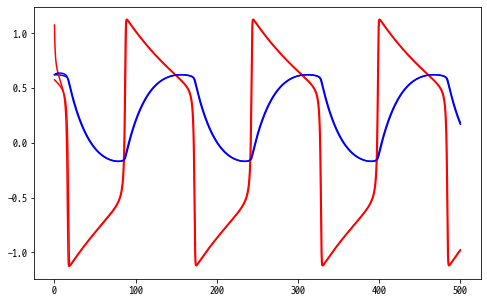

In [86]:
fig, ax = plt.subplots(figsize=(8, 5))

for j in range(len(traj)):
    ax.plot(t, traj[j][:, 0], color='red')
    ax.plot(t, traj[j][:, 1], color='blue')

plt.show()